<a href="https://colab.research.google.com/github/alexsandro-matias/lab_dio/blob/main/aula06_Visualiza%C3%A7%C3%A3o_de_Dados_no_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com Datas

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [5]:
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df["Receita"] = df["Vendas"] * df["Qtde"]

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [8]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

Convertendo o campo **Data** para inteiro:

In [9]:
df["Data"] = df["Data"].astype("int64")

Verificando a alteração:

In [10]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

Convertendo o campo Data para o tipo datetime:

In [11]:
df["Data"] = pd.to_datetime(df["Data"])

Verificando a alteração:

In [12]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

A ideia de agrupamento também pode ocorrer por datas, neste caso o somatório da receitas por ano:

In [13]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    117925.13
2019    226712.03
Name: Receita, dtype: float64

Para criação da coluna **Ano** no dataframe:

In [14]:
df["Ano_Venda"] = df["Data"].dt.year 

In [15]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
89,Salvador,2019-01-01,17.46,1034,1,17.46,2019
32,Natal,2019-03-17,244.00,854,2,488.00,2019
138,Natal,2019-01-02,212.03,1037,3,636.09,2019
89,Aracaju,2018-01-01,10.15,1523,7,71.05,2018
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019


Extraindo o **mês** e o **dia** do campo **Data**:

In [16]:
df["mes_venda"] , df["dia_venda"] = (df["Data"].dt.month , df["Data"].dt.day)

In [17]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
59,Recife,2019-01-01,89.39,983,5,446.95,2019,1,1
43,Aracaju,2018-01-01,19.63,1523,9,176.67,2018,1,1
170,Natal,2019-01-02,9.26,1035,3,27.78,2019,1,2
74,Aracaju,2018-01-01,7.86,1520,2,15.72,2018,1,1
212,Salvador,2019-01-02,50.73,1037,3,152.19,2019,1,2


Retornando a compra mais antiga:

In [18]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

Calculando a diferença entre datas:

In [19]:
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [20]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferenca_dias
140,Fortaleza,2019-03-02,166.89,983,5,834.45,2019,3,2,425 days
205,Salvador,2019-01-02,196.09,1037,1,196.09,2019,1,2,366 days
91,Fortaleza,2019-01-01,37.49,1002,1,37.49,2019,1,1,365 days
100,Salvador,2019-01-01,190.97,1036,2,381.94,2019,1,1,365 days
179,Salvador,2019-01-02,64.95,1036,1,64.95,2019,1,2,366 days


Criando a tabela trimestre:

In [21]:
df["Semestre_venda"] = df["Data"].dt.quarter

In [22]:
df.rename(columns={"Semestre_venda": "Trimestre_venda"})

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


In [23]:
df.tail(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Semestre_venda
230,Salvador,2019-01-03,184.69,1036,1,184.69,2019,1,3,367 days,1
231,Salvador,2019-01-03,89.85,1034,2,179.70,2019,1,3,367 days,1
232,Salvador,2019-01-03,167.76,1034,3,503.28,2019,1,3,367 days,1
233,Salvador,2019-01-03,172.40,1036,2,344.80,2019,1,3,367 days,1
234,Salvador,2019-01-03,48.39,1035,2,96.78,2019,1,3,367 days,1
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1
239,Salvador,2019-01-03,161.41,1037,3,484.23,2019,1,3,367 days,1


Para filtrar as vendas de 2019 e no mês de Março:



In [24]:
vendas_marco_2019 = df.loc[((df["mes_venda"] == 3)) & (df["Ano_Venda"] == 2019)]

In [25]:
vendas_marco_2019.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Semestre_venda
128,Fortaleza,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019,3,2,425 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,3,2,425 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1


# Visualização de Dados

Para verificar a contagem de vendas por loja:

In [26]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

Mostrando essa informação num gráfico:

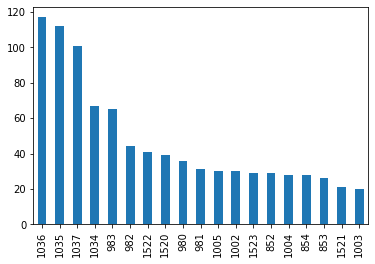

In [27]:
df["LojaID"].value_counts(ascending=False).plot.bar()

Para o mesmo gráfico porém de barras horizontais:

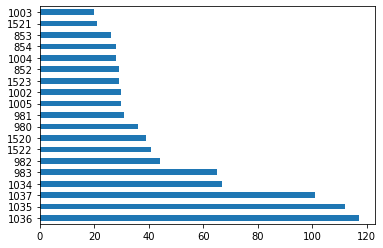

In [28]:
df["LojaID"].value_counts(ascending=False).plot.barh()

Para ordenação desse gráfico, deixaremos como o parâmetro **True**

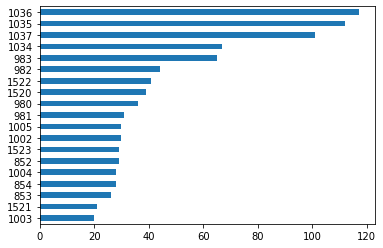

In [29]:
df["LojaID"].value_counts(ascending=True).plot.barh()

Na impressão do gráfico, para que não apareça essa descrição, basta terminar a instrução com o **" ; "** 

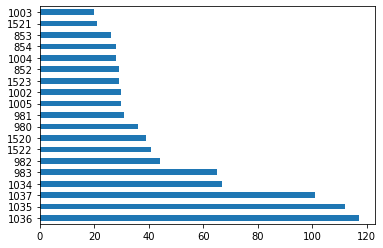

In [30]:
df["LojaID"].value_counts(ascending=False).plot.barh();

Usando o conhecimento anterior para realização do agrupamento:

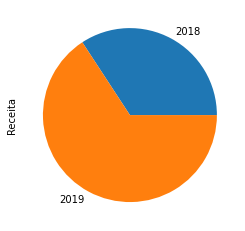

In [31]:
df.groupby(df["Ano_Venda"])["Receita"].sum().plot.pie();

Total de vendas por cidade:

In [32]:
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

## Personalizando os gráficos

Adicionando um título e alterando os eixos

Text(0, 0.5, 'Total de Vendas')

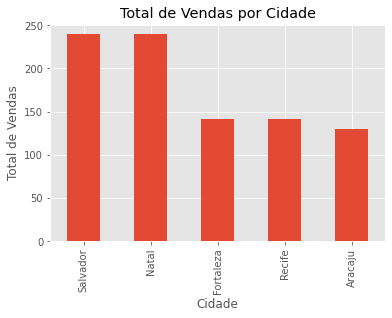

In [40]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Alterando a cor das barras

Text(0, 0.5, 'Total Vendas')

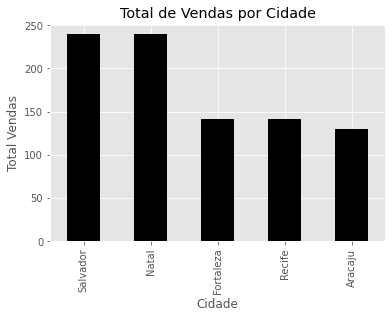

In [41]:
df["Cidade"].value_counts().plot.bar(title= "Total de Vendas por Cidade", color="black")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

## Alterando o estilo do gráfico

[Usando os exemplos](https://matplotlib.org/stable/gallery/index.html)

In [35]:
plt.style.use("ggplot")

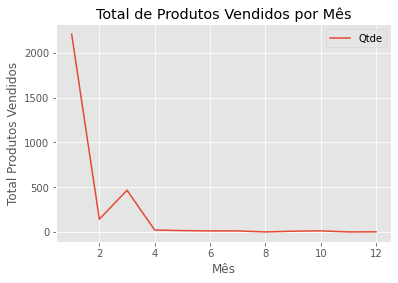

In [43]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [52]:
df_vendas_2019 = df[df["Ano_Venda"] == 2019]

Agrupando as vendas por 2019.

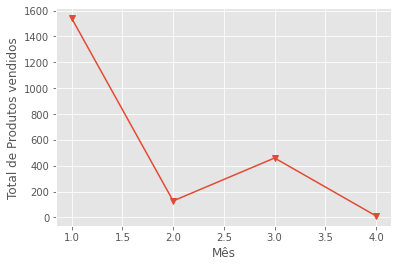

In [60]:
df_vendas_2019.groupby(df_vendas_2019["mes_venda"])["Qtde"].sum().plot(marker = 'v')
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos");

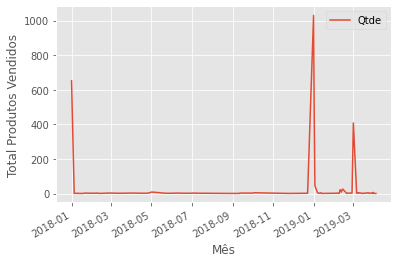

In [37]:
df.groupby(df["Data"])["Qtde"].sum().plot();
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

## Gráfico de Histograma

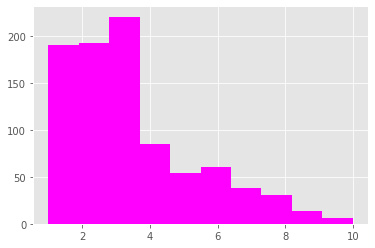

In [65]:
plt.hist(df["Qtde"], color="magenta");

## Gráfico de Dispersão

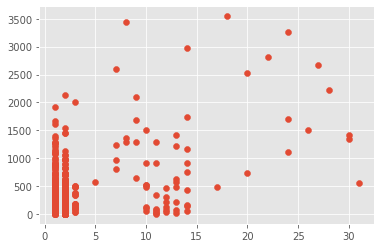

In [66]:
plt.scatter(x=df_vendas_2019["dia_venda"] , y = df_vendas_2019["Receita"]);

Salvando em formato .PNG

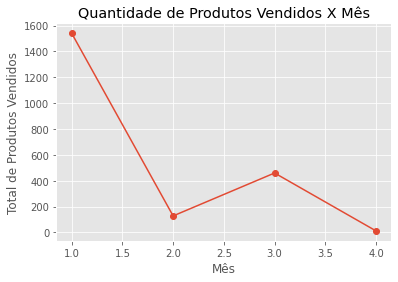

In [67]:
df_vendas_2019.groupby(df_vendas_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.savefig("grafico.quantidade_X_mes.png")